# 1.Get the numerical variables from our dataset.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv(r'C:\Users\ljant\Desktop\Ironhack\13_Statistics\lab-random-variable-distributions\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv')
def header_function (data):
    cols = []
    for i in range (len(data.columns)):
        cols.append(data.columns[i].lower().replace(' ','_'))
    
    data.columns = cols

    return data

header_function(df)
# 9.134 x 24

# numerical columns
df_num = df.select_dtypes(include=['int', 'float', 'datetime64'])
df_num
# 9.134 x 8

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


# 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

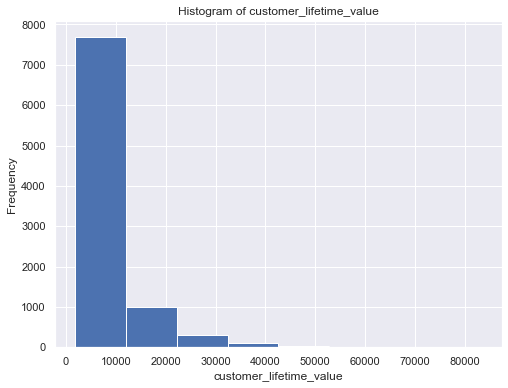

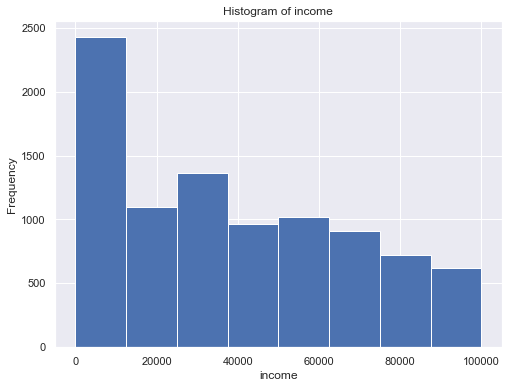

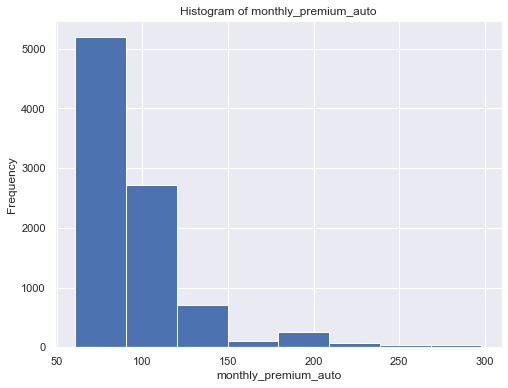

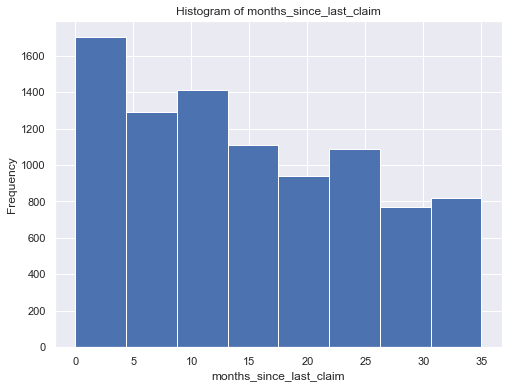

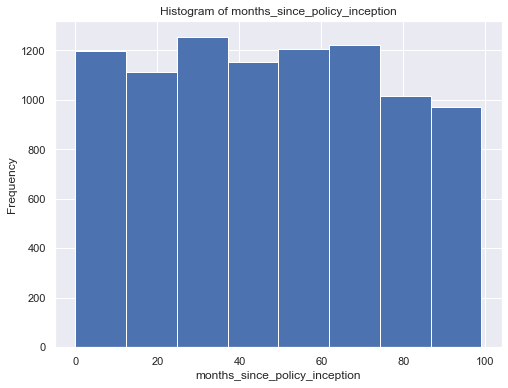

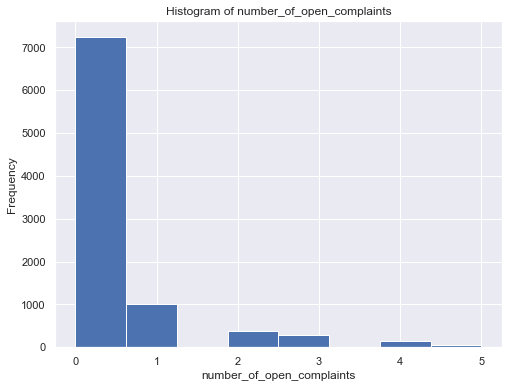

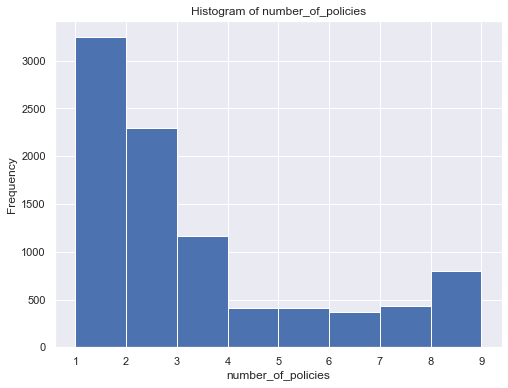

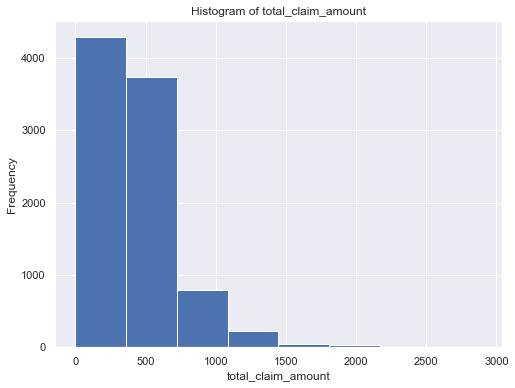

In [25]:
def histograms(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(8, 6))
        dataframe[column].plot(kind='hist', bins=8, title=f'Histogram of {column}') 
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

histograms(df_num)

In [ ]:
'''
- customer_lifetime_value likely follows are exponential distribution.
- monthly_premium_auto and number_of_policies might generally follow this trend as well.
- The other varibales seem not to follwo either an exponential nor theoretical normal distribution.
'''

# 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

3. a) Standardisation of the data

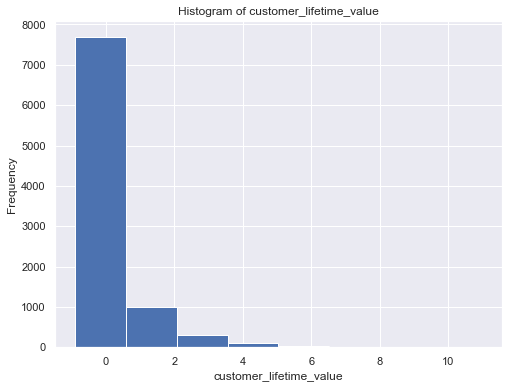

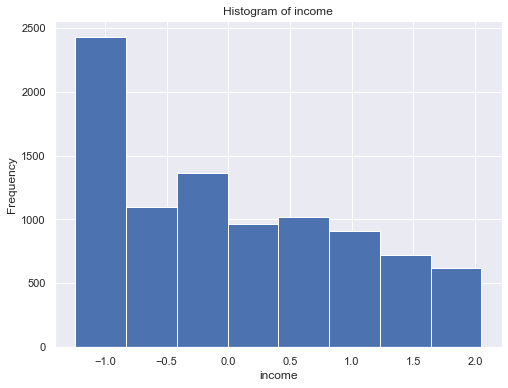

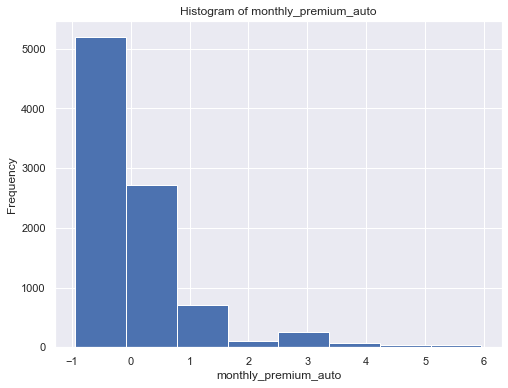

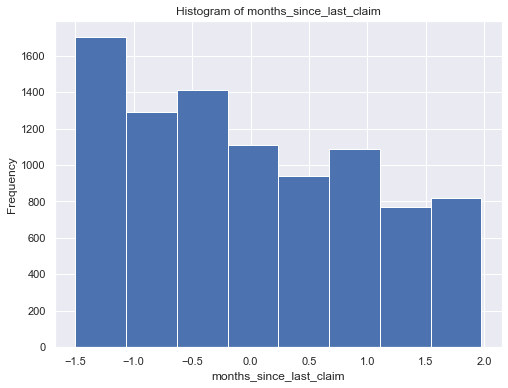

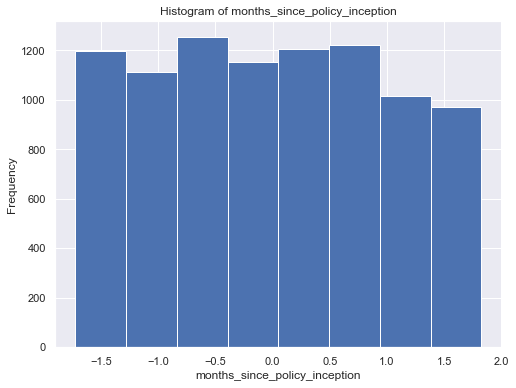

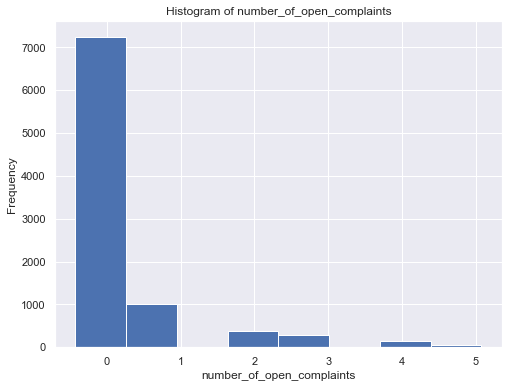

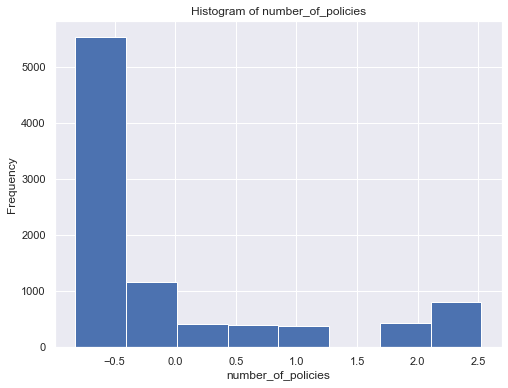

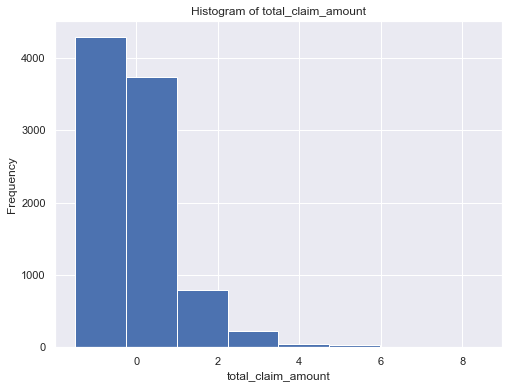

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stan_data = scaler.fit_transform(df_num) 
stan_data = pd.DataFrame(stan_data, columns = df_num.columns)

def histograms(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(8, 6))
        dataframe[column].plot(kind='hist', bins=8, title=f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

histograms(stan_data)

In [ ]:
'''
Standardising the data does not change the output of the plots.
'''

3. b) Normalisation of the data

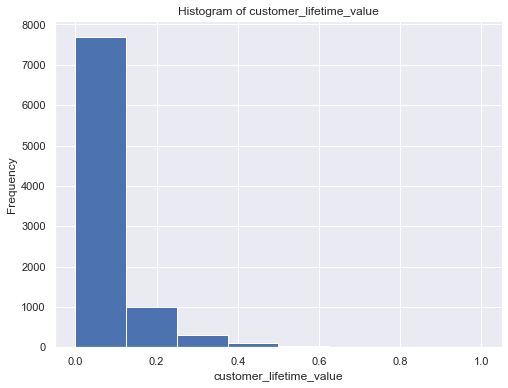

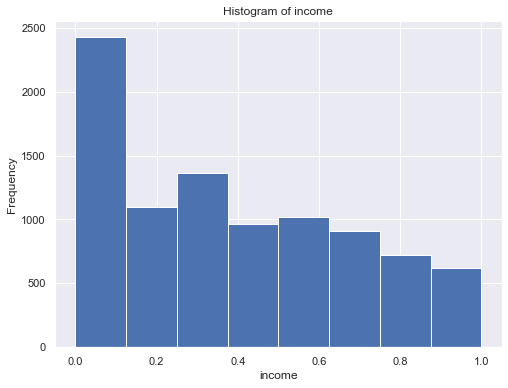

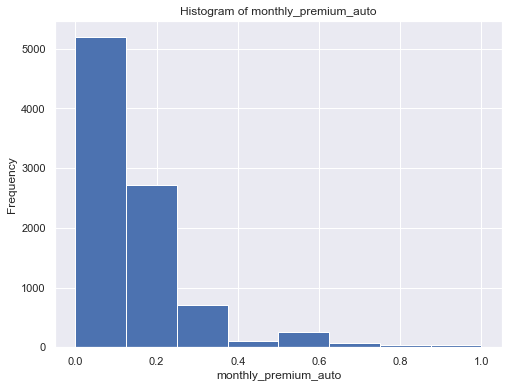

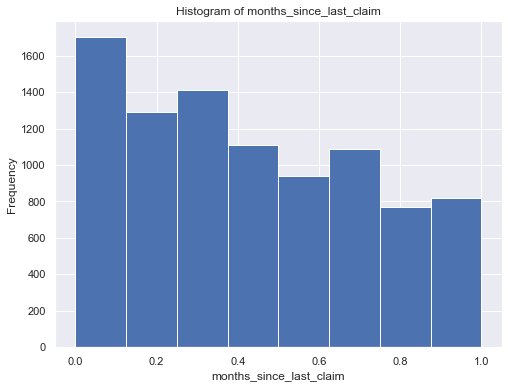

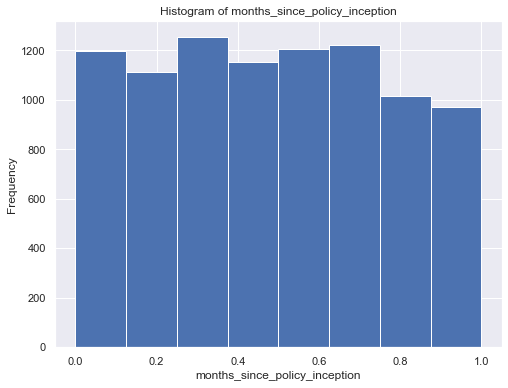

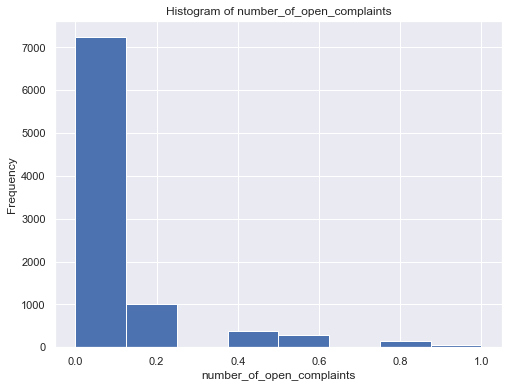

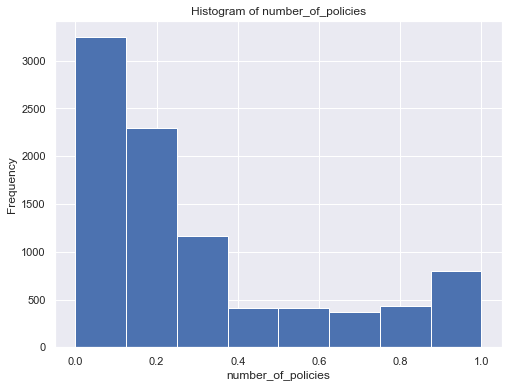

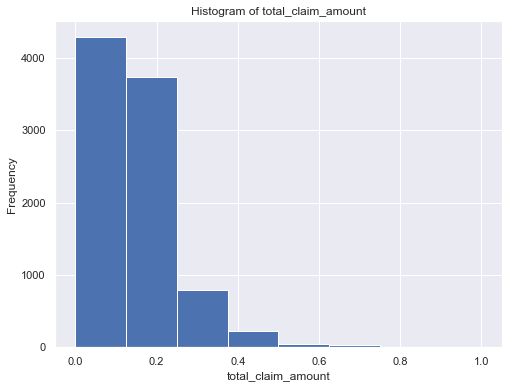

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
normalised_data = scaler.fit_transform(df_num)
normalised_data = pd.DataFrame(normalised_data, columns = df_num.columns)

def histograms(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(8, 6))
        dataframe[column].plot(kind='hist', bins=8, title=f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

histograms(normalised_data)

In [ ]:
'''
- Normalising the data, however, will try to fit a normal distribution to every value
'''

3. c) Logistic transformation of the data

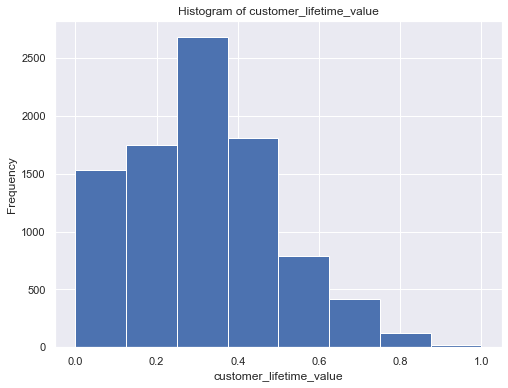

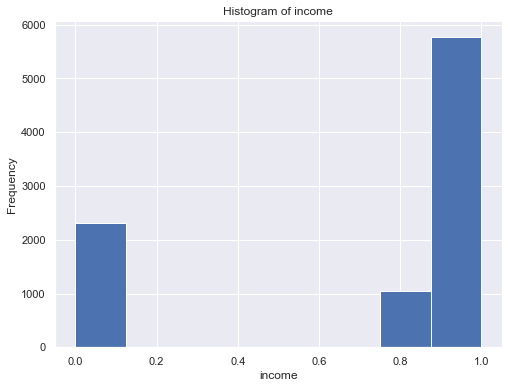

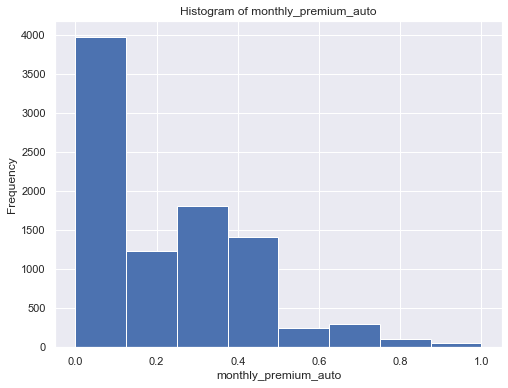

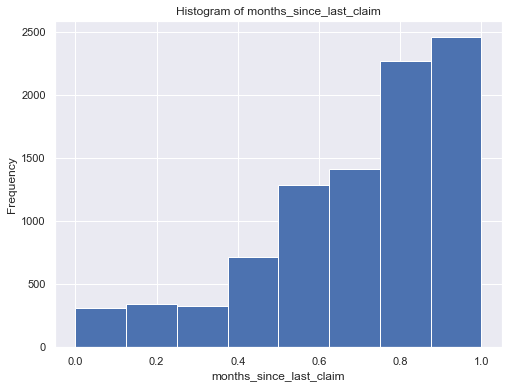

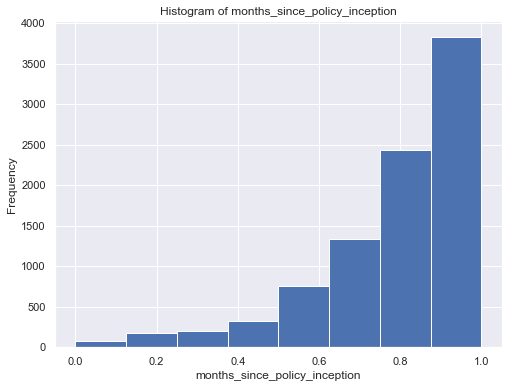

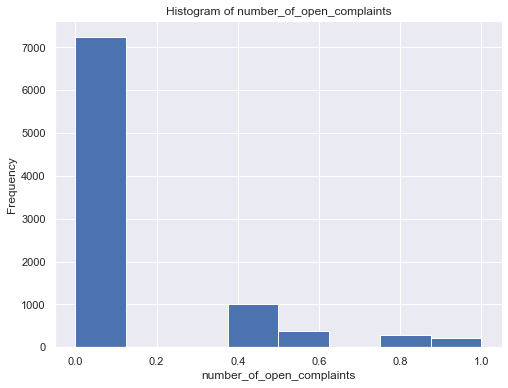

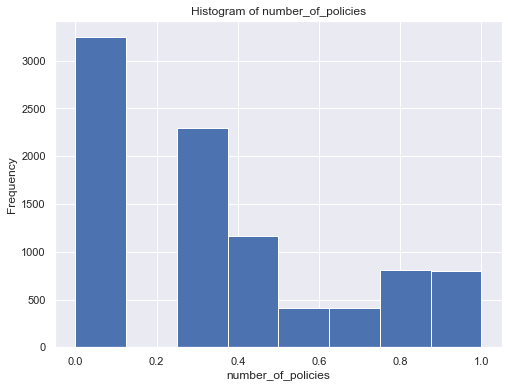

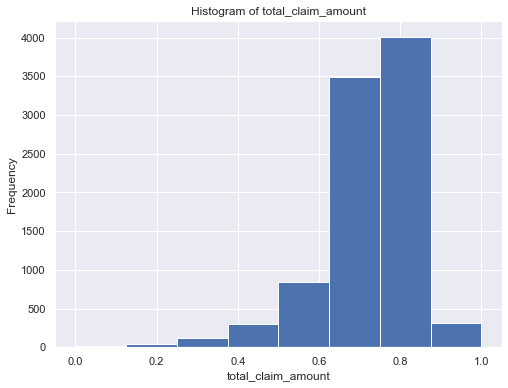

In [22]:
log_transformed = np.log1p(df_num)
log_data = scaler.fit_transform(log_transformed)
log_data = pd.DataFrame(log_data, columns = log_transformed.columns)

def histograms(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(8, 6))
        dataframe[column].plot(kind='hist', bins=8, title=f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

histograms(log_data)

In [27]:
'''
- With the log-transformation the distribution of all varibales will follow a exponential distribution.
'''

'\n- With the log-transformation the distribution of all varibales will follow a exponential distribution.\n'